In [4]:
import numpy as np
import pandas as pd

# Data Manipulation Toolbox


Entrainement Pandas : 

https://tanthiamhuat.files.wordpress.com/2018/04/pythondatasciencehandbook.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Single Line DataFrame
line = ["3","2","2","2","1","2","2","2","2","1","2","2"]
df_single = pd.DataFrame({'column1':line})
print(df_single.head(4))

  column1
0       3
1       2
2       2
3       2


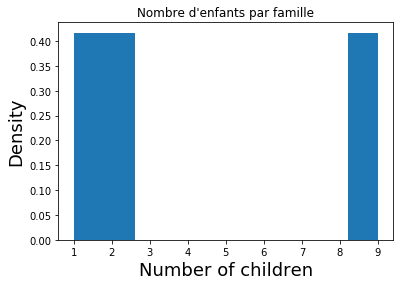

In [27]:
# Histogramme : Distribution d'une variable

groupby_family = df_single['column1'].groupby(df_single['column1']).count()
plt.figure()
plt.hist(groupby_family, normed=True)
plt.xlabel('Number of children', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title("Nombre d'enfants par famille")
plt.show()

# Pandas Objects

## Series

In [5]:
# Une série est l'association d'une séquence de valeurs, et une séquence d'index.

serie = pd.Series([0.1, 0.5, 1, 0.8, 0.4, 0.3, 0.4])
print(serie.values)
print(serie.index)

# Les données sont accessibles par index

print(serie[5]) # 0.3
print(serie[0:3])

[0.1 0.5 1.  0.8 0.4 0.3 0.4]
RangeIndex(start=0, stop=7, step=1)
0.3
0    0.1
1    0.5
2    1.0
dtype: float64


La difference des Series avec un simple array Numpy se situe au niveau de l'index
- Numpy possède un index défini implicitement, utilisé pour accéder aux données.
- Pandas Series possède un index défini explicitement, associé aux valeurs.

Ainsi, la Series possède des capacités supplémentaires. Par exemple, l'index n'a pas besoin d'être un entier et peut être de n'importe quel type, strings par exemple.

In [21]:
serie = pd.Series(data=[0.1, 0.5, 1, 0.8, 0.4, 0.3, 0.4],
                 index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(serie)

# On y accède donc par l'index 
print(serie['a'])

a    0.1
b    0.5
c    1.0
d    0.8
e    0.4
f    0.3
g    0.4
dtype: float64
0.1


### Les series comme des dictionnaires spéciaux

- Un dict est une structure qui relie des clés, à un ensemble de valeurs.
- Une Series est une structure qui relie des clés typés à un ensemble de valeurs typées.

Cette difference dans le typage est importante : Là où le code spécifique aux types de données derrière un array Numpy rend certaines opérations plus rapides, le type dans dans une Series Pandas rend plus efficace certaines opérations par rapport aux dictionnaires.

Avantage par rapport aux dictionnaires, la Series supporte les opérations d'arrays comme le slicing.

In [26]:
population_dict = {
    'California':38332521,
    'Texas':26448193,
    'New York':19651127,
    'Florida':19552860,
    'Illinois':12882135
}

# La Series est crée à partir des clés ordonnées
population_serie = pd.Series(population_dict)
print(population_serie)
print(population_serie['California'])
print(population_serie['California':'New York'])

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
38332521
California    38332521
Texas         26448193
New York      19651127
dtype: int64


### Création de Series

DOC : ** serie = pd.Series(data, index=index) **

In [30]:
# Data peut être simplement un array 
serie = pd.Series([1,2,3,4,5])

# Data peut être unitaire et sera répliquée sur l'index défini
serie = pd.Series(data=5, index=[2, 100, 1000])

# Data peut être un dictionnaire comme vu précedemment
serie = pd.Series({1:'a', 2:'b', 3:'c'})

# On peut filtrer les données en jouant sur l'index
serie = pd.Series({1:'a', 2:'b', 3:'c'}, index=[2, 3])

## Dataframes

Un dataframe est un tableau rectangulaire de données, qui contient des colonnes ordonnées, chacune pouvant contenir un type de donnée différent. Le Dataframe possède un index sur les lignes, et les colonnes.

### Construction

La manière la plus simple de créer un dataframe : passer par un dictionnaire de liste/NP arrays de memes longueur.

In [8]:
dict = {'model': ['iPhone', 'iMac', 'Macbook Air', 'Macbook Pro'],
      'prix': [1000, 2500, 1200, 1600],
      'annee': [2018, 2017, 2018, 2017]}
df_dict = pd.DataFrame(dict)
df_dict.head()

,model,prix,annee
0,iPhone,1000,2018
1,iMac,2500,2017
2,Macbook Air,1200,2018
3,Macbook Pro,1600,2017


In [17]:
# Modifier l'index du dataframe
df_dict_idx = pd.DataFrame(
    dict, 
    columns=['model', 'prix', 'annee'],
    index=['un', 'deux', 'trois', 'quatre'])
df_dict_idx

,model,prix,annee
un,iPhone,1000,2018
deux,iMac,2500,2017
trois,Macbook Air,1200,2018
quatre,Macbook Pro,1600,2017


### Afficher données

In [9]:
# Spécifier l'ordre des colonnes
pd.DataFrame(df_dict, columns=['annee', 'prix', 'model'])

,annee,prix,model
0,2018,1000,iPhone
1,2017,2500,iMac
2,2018,1200,Macbook Air
3,2017,1600,Macbook Pro


In [10]:
# Recuperer les colonnes
df_dict.columns

Index(['model', 'prix', 'annee'], dtype='object')

In [13]:
# Requete colonne
df_dict.annee
df_dict['model']

0         iPhone
1           iMac
2    Macbook Air
3    Macbook Pro
Name: model, dtype: object

In [19]:
# Les lignes peuvent aussi être recupérées par nom ou position de l'index
df_dict_idx.loc['trois']

model    Macbook Air
prix            1200
annee           2018
Name: trois, dtype: object

In [24]:
df_dict_idx['garantie'] = range(12, 20, 2)
df_dict_idx

,model,prix,annee,garantie
un,iPhone,1000,2018,12
deux,iMac,2500,2017,14
trois,Macbook Air,1200,2018,16
quatre,Macbook Pro,1600,2017,18


In [26]:
# Ajouter une colonne calée sur l'index
add_col = pd.Series(
    [12, 14, 16, 18], 
    index=['un', 'trois', 'deux', 'quatre'])

df_dict_idx['garantie'] = add_col
df_dict_idx

,model,prix,annee,garantie
un,iPhone,1000,2018,12
deux,iMac,2500,2017,16
trois,Macbook Air,1200,2018,14
quatre,Macbook Pro,1600,2017,18


In [28]:
# Ajouter colonne sur condition
df_dict_idx['durable'] = df_dict_idx.garantie > 18
df_dict_idx

,model,prix,annee,garantie,durable
un,iPhone,1000,2018,12,False
deux,iMac,2500,2017,16,False
trois,Macbook Air,1200,2018,14,False
quatre,Macbook Pro,1600,2017,18,False


In [29]:
# Supprimer colonne
del df_dict_idx['durable']
df_dict_idx

,model,prix,annee,garantie
un,iPhone,1000,2018,12
deux,iMac,2500,2017,16
trois,Macbook Air,1200,2018,14
quatre,Macbook Pro,1600,2017,18


In [36]:
# Autre manière : nested dist of dicts
# Clés exterieures : Colonnes
# Clés interieures : Row index

pop = {'Nevada': {2000: 2.1, 2001: 2.4, 2002: 2.9},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame = pd.DataFrame(pop)
print(frame)
print(frame.T)

      Nevada  Ohio
2000     2.1   1.5
2001     2.4   1.7
2002     2.9   3.6
        2000  2001  2002
Nevada   2.1   2.4   2.9
Ohio     1.5   1.7   3.6


In [44]:
pdata = {'Ohio': frame['Ohio'][:-1],
        'Nevada': frame['Nevada'][:2]}
frame2 = pd.DataFrame(pdata)

In [47]:
frame2.index.name = 'year'
frame2.columns.name = 'state'
frame2.values

array([[1.5, 2.1],
       [1.7, 2.4]])

## Objet Index

## Enumerate

In [5]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list, 1):
    print(c, value)

1 apple
2 banana
3 grapes
4 pear
